About Dataset
This dataset contains extensive health information for 2,392 patients diagnosed with Asthma Disease, uniquely identified with IDs ranging from 5034 to 7425. It includes demographic details, lifestyle factors, environmental and allergy factors, medical history, clinical measurements, symptoms, and a diagnosis indicator. This dataset is valuable for researchers and data scientists aiming to explore factors associated with Asthma, develop predictive models, and conduct statistical analyses.

In [126]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/asthma-disease-dataset/asthma_disease_data.csv


# Loading Data

In [127]:
df = pd.read_csv('/kaggle/input/asthma-disease-dataset/asthma_disease_data.csv')

In [128]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


# Data Preprocessing

Data Preprocessing

In [129]:
# Columns to be standardized
continuous_cols = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'LungFunctionFEV1', 'LungFunctionFVC']


In [130]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [131]:
# Standardize the continuous variables
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [132]:
# Display the first few rows of the normalized data
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,0.965740,0,1,0,-1.582769,0,-1.432099,0.160113,0.971063,...,-1.368934,0.920608,0,0,1,0,0,1,0,Dr_Confid
1,5035,-0.747054,1,2,2,-0.623300,0,0.291269,0.453069,-1.076746,...,-0.407132,-1.564256,1,0,0,1,1,1,0,Dr_Confid
2,5036,0.687989,0,2,1,-1.229074,0,0.581330,1.434458,-0.102976,...,-0.987146,0.983019,1,1,1,0,1,1,0,Dr_Confid
3,5037,-0.098970,1,2,1,1.565307,0,-1.256398,0.276233,-1.596880,...,0.561114,-1.105641,1,0,1,1,1,0,0,Dr_Confid
4,5038,0.873156,0,0,3,-1.105686,0,-0.154081,-0.651625,1.504976,...,1.070095,-0.516586,1,1,1,0,0,1,0,Dr_Confid


In [133]:
# Verify the columns in the DataFrame
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [134]:
# List of possible categorical columns to be encoded
all_categorical_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'Wheezing', 
                        'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 
                        'ExerciseInduced', 'Diagnosis']

In [135]:
# Determine which categorical columns are present in the DataFrame
present_categorical_cols = [col for col in all_categorical_cols if col in df.columns]

# One-hot encode the categorical variables that are present
df = pd.get_dummies(df, columns=present_categorical_cols)

# Display the first few rows of the transformed data
df.head()


,PatientID,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,...,ChestTightness_0,ChestTightness_1,Coughing_0,Coughing_1,NighttimeSymptoms_0,NighttimeSymptoms_1,ExerciseInduced_0,ExerciseInduced_1,Diagnosis_0,Diagnosis_1
0,5034,0.965740,-1.582769,-1.432099,0.160113,0.971063,7.388481,2.855578,0.974339,1,...,False,True,True,False,True,False,False,True,True,False
1,5035,-0.747054,-0.623300,0.291269,0.453069,-1.076746,1.969838,7.457665,6.584631,0,...,True,False,False,True,False,True,False,True,True,False
2,5036,0.687989,-1.229074,0.581330,1.434458,-0.102976,1.460593,1.448189,5.445799,0,...,False,True,True,False,False,True,False,True,True,False
3,5037,-0.098970,1.565307,-1.256398,0.276233,-1.596880,0.581905,7.571845,3.965316,0,...,False,True,False,True,False,True,True,False,True,False
4,5038,0.873156,-1.105686,-0.154081,-0.651625,1.504976,0.980875,3.049807,8.260605,0,...,False,True,True,False,True,False,False,True,True,False


In [136]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 PatientID                 0
Age                       0
BMI                       0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
DoctorInCharge            0
Gender_0                  0
Gender_1                  0
Ethnicity_0               0
Ethnicity_1               0
Ethnicity_2               0
Ethnicity_3               0
EducationLevel_0          0
EducationLevel_1          0
EducationLevel_2          0
EducationLevel_3          0
Smoking_0                 0
Smoking_1                 0
Wheezing_0                0
Wheezing_1                0
ShortnessOfBreath_0       0
ShortnessOfBreath_1       0
ChestTightness_0          0
Che

In [137]:
#dropping na values
df.dropna(inplace=True)

In [138]:
# Remove columns with missing values (if applicable)
df.dropna(axis=1, inplace=True)

In [139]:
# Print the updated dataset after handling missing values
df.head()

,PatientID,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,...,ChestTightness_0,ChestTightness_1,Coughing_0,Coughing_1,NighttimeSymptoms_0,NighttimeSymptoms_1,ExerciseInduced_0,ExerciseInduced_1,Diagnosis_0,Diagnosis_1
0,5034,0.965740,-1.582769,-1.432099,0.160113,0.971063,7.388481,2.855578,0.974339,1,...,False,True,True,False,True,False,False,True,True,False
1,5035,-0.747054,-0.623300,0.291269,0.453069,-1.076746,1.969838,7.457665,6.584631,0,...,True,False,False,True,False,True,False,True,True,False
2,5036,0.687989,-1.229074,0.581330,1.434458,-0.102976,1.460593,1.448189,5.445799,0,...,False,True,True,False,False,True,False,True,True,False
3,5037,-0.098970,1.565307,-1.256398,0.276233,-1.596880,0.581905,7.571845,3.965316,0,...,False,True,False,True,False,True,True,False,True,False
4,5038,0.873156,-1.105686,-0.154081,-0.651625,1.504976,0.980875,3.049807,8.260605,0,...,False,True,True,False,True,False,False,True,True,False


**Step 2: Implement K-means Clustering**

In [140]:
# Drop non-numeric columns before clustering
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Display the first few rows of the numeric DataFrame
numeric_df.head()

,PatientID,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC
0,5034,0.965740,-1.582769,-1.432099,0.160113,0.971063,7.388481,2.855578,0.974339,1,1,0,0,0,0,-1.368934,0.920608
1,5035,-0.747054,-0.623300,0.291269,0.453069,-1.076746,1.969838,7.457665,6.584631,0,0,1,0,0,0,-0.407132,-1.564256
2,5036,0.687989,-1.229074,0.581330,1.434458,-0.102976,1.460593,1.448189,5.445799,0,1,1,0,1,0,-0.987146,0.983019
3,5037,-0.098970,1.565307,-1.256398,0.276233,-1.596880,0.581905,7.571845,3.965316,0,0,0,0,1,0,0.561114,-1.105641
4,5038,0.873156,-1.105686,-0.154081,-0.651625,1.504976,0.980875,3.049807,8.260605,0,0,0,0,1,0,1.070095,-0.516586


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

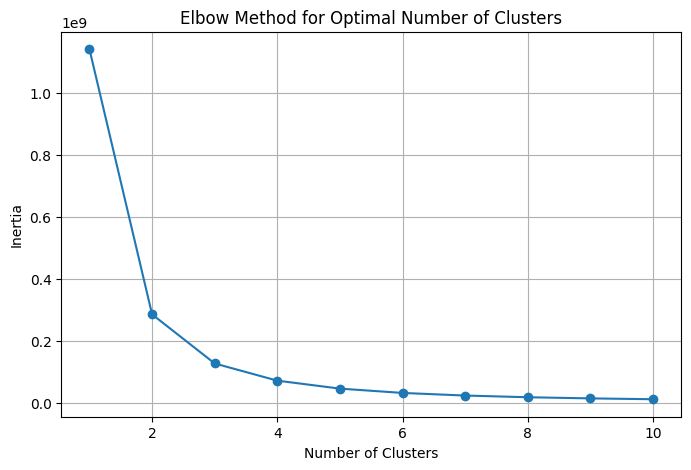

In [141]:
# Initialize list to store inertia values
inertia = []

# Define range of clusters to test
clusters_range = range(1, 11)

# Fit K-means for each cluster value and calculate inertia
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_df)  # Use the numeric DataFrame here
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


Determine Optimal Clusters and Fit K-means

In [142]:
# Choose the optimal number of clusters based on the Elbow plot
optimal_clusters = 3  # Adjust based on the Elbow plot

# Initialize K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit K-means to the numeric data
kmeans.fit(numeric_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels to original DataFrame
df['Cluster'] = cluster_labels

# Display cluster centers (centroids)
print("Cluster Centers:")
print(kmeans.cluster_centers_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[ 6.22700000e+03  1.49298611e-02 -1.33932872e-02 -1.49177441e-02
   2.90699960e-02 -3.01394765e-02  4.90811224e+00  4.98949167e+00
   5.04693392e+00  1.74404015e-01  3.02383940e-01  4.02760351e-01
   1.90715182e-01  2.57214555e-01  1.46800502e-01  1.72754140e-02
  -2.55581545e-02]
 [ 7.02550000e+03 -3.46243442e-02  1.22151412e-02  5.01110628e-02
  -3.99474145e-02 -6.07074550e-03  5.04686342e+00  5.12799319e+00
   4.97437833e+00  1.51250000e-01  3.07500000e-01  4.18750000e-01
   1.81250000e-01  2.55000000e-01  1.62500000e-01 -1.47319423e-02
   4.51092757e-02]
 [ 5.43100000e+03  1.98746869e-02  1.13501500e-03 -3.54709537e-02
   1.10555281e-02  3.63242253e-02  5.08416490e+00  5.22540471e+00
   4.92416374e+00  1.72327044e-01  2.93081761e-01  3.76100629e-01
   2.03773585e-01  2.47798742e-01  1.64779874e-01 -2.49427814e-03
  -1.97705301e-02]]


In [143]:
# Fill missing values with mean (if needed)
numeric_df.fillna(numeric_df.mean(), inplace=True)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

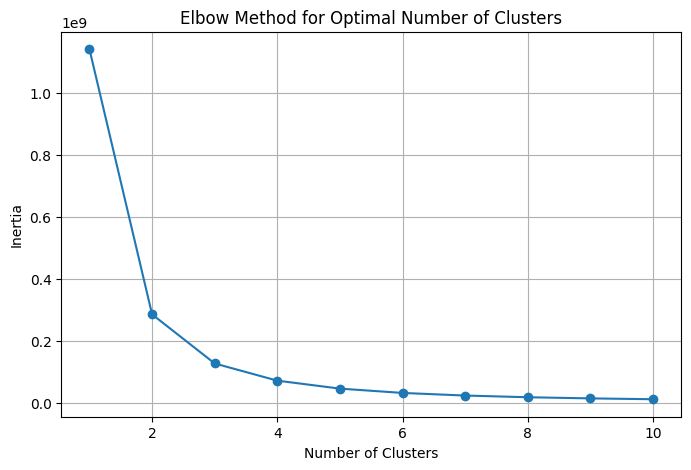

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [144]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Implementing the Elbow Method to determine the optimal number of clusters
inertia = []
clusters_range = range(1, 11)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters based on the Elbow plot
optimal_clusters = 3  # Adjust based on the Elbow plot

# Initialize K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)

# Fit K-means to the numeric data
kmeans.fit(numeric_df)

# Get cluster labels
cluster_labels = kmeans.labels_


In [145]:
# Assign cluster labels to original DataFrame
df['Cluster'] = cluster_labels

In [146]:
# Display cluster centers (centroids)
print("Cluster Centers:")
kmeans.cluster_centers_

Cluster Centers:


array([[ 6.22700000e+03,  1.49298611e-02, -1.33932872e-02,
        -1.49177441e-02,  2.90699960e-02, -3.01394765e-02,
         4.90811224e+00,  4.98949167e+00,  5.04693392e+00,
         1.74404015e-01,  3.02383940e-01,  4.02760351e-01,
         1.90715182e-01,  2.57214555e-01,  1.46800502e-01,
         1.72754140e-02, -2.55581545e-02],
       [ 7.02550000e+03, -3.46243442e-02,  1.22151412e-02,
         5.01110628e-02, -3.99474145e-02, -6.07074550e-03,
         5.04686342e+00,  5.12799319e+00,  4.97437833e+00,
         1.51250000e-01,  3.07500000e-01,  4.18750000e-01,
         1.81250000e-01,  2.55000000e-01,  1.62500000e-01,
        -1.47319423e-02,  4.51092757e-02],
       [ 5.43100000e+03,  1.98746869e-02,  1.13501500e-03,
        -3.54709537e-02,  1.10555281e-02,  3.63242253e-02,
         5.08416490e+00,  5.22540471e+00,  4.92416374e+00,
         1.72327044e-01,  2.93081761e-01,  3.76100629e-01,
         2.03773585e-01,  2.47798742e-01,  1.64779874e-01,
        -2.49427814e-03, -1.9

In [147]:
# Analyze the characteristics of each cluster
cluster_summary = numeric_df.groupby(cluster_labels).mean()
print("Cluster Summary:")
cluster_summary

Cluster Summary:


,PatientID,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC
0,6228.0,0.013710,-0.012794,-0.016445,0.027757,-0.028876,4.908604,4.987487,5.048868,0.174404,0.302384,0.401506,0.190715,0.257215,0.146801,0.019266,-0.028004
1,7026.0,-0.033037,0.010927,0.051403,-0.040090,-0.007319,5.041446,5.128965,4.968358,0.151439,0.307885,0.419274,0.181477,0.255319,0.162703,-0.015356,0.046109
2,5431.5,0.019435,0.001842,-0.035131,0.012449,0.036258,5.089063,5.226315,4.928333,0.172111,0.292714,0.376884,0.203518,0.247487,0.164573,-0.003876,-0.018243


# Analyzing Clusters and Identifying High-Risk Factors

In [148]:
# Assuming you have already preprocessed your data and selected numeric columns in `numeric_df`
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(numeric_df)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [149]:
# Assuming df is your DataFrame with assigned Cluster labels
# Select numeric columns (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=np.number)

# Group by 'Cluster' and calculate mean
cluster_summary = numeric_columns.groupby('Cluster').mean()

print("Cluster Summary:")
cluster_summary


Cluster Summary:


,PatientID,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC
Cluster,,,,,,,,,,,,,,,,,
0,6228.0,0.013710,-0.012794,-0.016445,0.027757,-0.028876,4.908604,4.987487,5.048868,0.174404,0.302384,0.401506,0.190715,0.257215,0.146801,0.019266,-0.028004
1,7026.0,-0.033037,0.010927,0.051403,-0.040090,-0.007319,5.041446,5.128965,4.968358,0.151439,0.307885,0.419274,0.181477,0.255319,0.162703,-0.015356,0.046109
2,5431.5,0.019435,0.001842,-0.035131,0.012449,0.036258,5.089063,5.226315,4.928333,0.172111,0.292714,0.376884,0.203518,0.247487,0.164573,-0.003876,-0.018243


**Identify High-Risk Clusters**

In [150]:
# Define thresholds or criteria for high-risk factors (adjust as needed)
high_bmi_threshold = 30.0
low_activity_threshold = 2.0
poor_diet_quality_levels = ['Poor']

# Identify high-risk clusters based on defined criteria
high_risk_clusters = df.groupby('Cluster').apply(lambda x: (
    x['BMI'].mean() > high_bmi_threshold or
    x['PhysicalActivity'].mean() < low_activity_threshold or
    any(dq in poor_diet_quality_levels for dq in x['DietQuality'])
)).index.tolist()

print("Clusters with High-Risk Factors:")
print(high_risk_clusters)


Clusters with High-Risk Factors:
[0, 1, 2]


/tmp/ipykernel_32/2179404725.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_risk_clusters = df.groupby('Cluster').apply(lambda x: (


**Tailored Preventive Care Programs**

In [151]:
# Example of Tailored Preventive Care Programs

def weight_management_program(cluster_data):
    # Implement weight management program logic here
    print("Implementing weight management program for cluster:", cluster_data['Cluster'].iloc[0])

def exercise_program(cluster_data):
    # Implement exercise program logic here
    print("Implementing exercise program for cluster:", cluster_data['Cluster'].iloc[0])

# Example usage:
for cluster_id, cluster_data in df.groupby('Cluster'):
    if cluster_id in high_risk_clusters:
        # Execute appropriate preventive care programs based on cluster characteristics
        if cluster_data['BMI'].mean() > high_bmi_threshold:
            weight_management_program(cluster_data)
        if cluster_data['PhysicalActivity'].mean() < low_activity_threshold:
            exercise_program(cluster_data)


Implementing exercise program for cluster: 0
Implementing exercise program for cluster: 1
Implementing exercise program for cluster: 2


**Develop Preventive Care Programs and Predicting Health Risks for New Patients**

In [152]:
def weight_management_program(cluster_data):
    # Example: Print cluster information and recommend weight management program
    cluster_id = cluster_data['Cluster'].iloc[0]
    print(f"Cluster {cluster_id}: Implementing weight management program.")

def exercise_program(cluster_data):
    # Example: Print cluster information and recommend exercise program
    cluster_id = cluster_data['Cluster'].iloc[0]
    print(f"Cluster {cluster_id}: Implementing exercise program.")

# Implement preventive care programs for high-risk clusters
for cluster_id, cluster_data in df.groupby('Cluster'):
    if cluster_id in high_risk_clusters:
        if cluster_data['BMI'].mean() > high_bmi_threshold:
            weight_management_program(cluster_data)
        if cluster_data['PhysicalActivity'].mean() < low_activity_threshold:
            exercise_program(cluster_data)


Cluster 0: Implementing exercise program.
Cluster 1: Implementing exercise program.
Cluster 2: Implementing exercise program.


Lifestyle Modification Programs

In [153]:
def lifestyle_modification_program(cluster_data):
    # Example: Print cluster information and recommend lifestyle modification program
    cluster_id = cluster_data['Cluster'].iloc[0]
    print(f"Cluster {cluster_id}: Implementing lifestyle modification program tailored to needs.")

# Implement lifestyle modification programs for all clusters (example)
for cluster_id, cluster_data in df.groupby('Cluster'):
    lifestyle_modification_program(cluster_data)


Cluster 0: Implementing lifestyle modification program tailored to needs.
Cluster 1: Implementing lifestyle modification program tailored to needs.
Cluster 2: Implementing lifestyle modification program tailored to needs.


Integrate Clustering Results into Clinical Decision Support Systems

new_patients_df = pd.DataFrame(df)

def get_patient_risk_level(patient_id):
    # Example function to retrieve risk level based on cluster characteristics
    cluster_id = new_patients_df.loc[new_patients_df['PatientID'] == patient_id, 'Cluster'].values[0]
    cluster_data = df[df['Cluster'] == cluster_id]
    
    # Calculate risk level based on cluster characteristics
    # Example: Combine BMI, physical activity, and other metrics to assess risk
    risk_level = 'High' if cluster_data['BMI'].mean() > 30 else 'Low'
    
    return risk_level

# Example usage:
patient_id = 101  # Replace with actual patient ID
risk_level = get_patient_risk_level(patient_id)
print(f"Patient {patient_id} has a {risk_level} health risk based on cluster analysis.")


In [155]:
new_patients_df = df.copy()  # Assuming new_patients_df is a copy of df

def get_patient_risk_level(patient_id, new_patients_df, df):
    try:
        # Retrieve cluster ID for the patient
        cluster_id = new_patients_df.loc[new_patients_df['PatientID'] == patient_id, 'Cluster'].values[0]

        # Filter data for patients in the same cluster
        cluster_data = df[df['Cluster'] == cluster_id]

        # Calculate risk level based on cluster characteristics
        # Example: Combine BMI, physical activity, and other metrics to assess risk
        risk_level = 'High' if cluster_data['BMI'].mean() > 30 else 'Low'
        
    except IndexError:
        risk_level = 'Not Found'  # Handle case where patient ID is not found
    
    return risk_level

# Example usage:
patient_id = 200  # Replace with actual patient ID
risk_level = get_patient_risk_level(patient_id, new_patients_df, df)
print(f"Patient {patient_id} has a {risk_level} health risk based on cluster analysis.")


Patient 200 has a Not Found health risk based on cluster analysis.
